In [185]:
# Mujeeb Quadri
# Homework 4
# SID: 801157040
# 11/25/2021

In [186]:
# Importing libraries from given Canvas file
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [187]:
# Importing cancer data
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer() 
breast_data = breast.data
# Getting cancer dataset
breast_input = pd.DataFrame(breast_data)

In [188]:
# Finding shape of data
# Find shape
breast_data.shape 

(569, 30)

In [189]:
breast_labels = breast.target # label variable

In [190]:
# Preparing data labels
labels = np.reshape(breast_labels,(569,1)) 
end_breast_data = np.concatenate([breast_data,labels],axis=1)
end_breast_data.shape 
breast_dataset = pd.DataFrame(end_breast_data)

In [191]:
# Naming and inputting features into matrix labels
features = breast.feature_names 

In [192]:
# Appending label from features
features_labels = np.append(features,'label')

In [193]:
breast_dataset.columns = features_labels # Inputting labels into dataset

In [194]:
# Displaying Initial dataset
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [195]:
# Dataset splitting
x = breast_dataset.iloc[:, 0:29].values
y = breast_dataset.iloc[:, 30].values

In [196]:
# Displaying new dataset
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [197]:
# Import library for splitting train and test sets
from sklearn.model_selection import train_test_split

# Import StandardScaler for standardization
from sklearn.preprocessing import StandardScaler

# Importing PCA for feature extraction
from sklearn.decomposition import PCA 

In [198]:
# Setting train/test splits
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

# Feature standardization and scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [199]:
# PCA feature extraction for training, where 2 is the ideal number of components
pca = PCA(n_components = 2) 
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

Text(0, 0.5, 'Principal Component #2')

<Figure size 432x288 with 0 Axes>

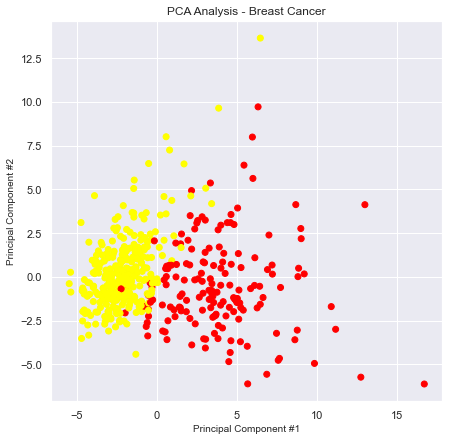

In [200]:
# Plotting breast cancer data
plt.figure()
plt.figure(figsize=(7,7))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='autumn')
plt.title("PCA Analysis - Breast Cancer")
plt.xlabel('Principal Component #1', fontsize = 10)
plt.ylabel('Principal Component #2', fontsize = 10)

In [201]:
# Importing Linear SVC
from sklearn.svm import SVC 

In [202]:
# Using Kernal for model
model = SVC(kernel='linear', C=1E10) 
model.fit(x_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# Model prediction for dataset being tested
y_prediction = model.predict(x_test)

# Printing Metrics from prediction
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))
print("Precision:",metrics.precision_score(y_test, y_prediction))
print("Recall:",metrics.recall_score(y_test, y_prediciton))